# Import Libraries

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Load the Dataset

In [35]:
# Load the CSV file (adjust the path if needed)
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Confirm successful load
print("Dataset loaded successfully!")
print(f"Shape of dataset: {df.shape} (rows, columns)")

Dataset loaded successfully!
Shape of dataset: (7043, 21) (rows, columns)


# Initial Data Inspection

## a. Preview First 5 Rows

In [36]:
# View the first 5 rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## b. Check Data Types and Missing Values

In [37]:
# Get data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## c. Summary Statistics for Numerical Columns

In [38]:
# Summary stats for numerical features
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## d. Check for Missing Values

In [39]:
# Check explicit missing values
print("Missing Values:")
print(df.isnull().sum())

# Check for implicit missing values (e.g., blank strings)
print("\nBlank Strings in TotalCharges:", df['TotalCharges'].eq(' ').sum())

Missing Values:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Blank Strings in TotalCharges: 11


## e. Fix Data Types

In [40]:
# Convert TotalCharges to numeric (replace blanks with NaN)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Confirm conversion
print("Data Types After Conversion:")
print(df.dtypes)

Data Types After Conversion:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


# Preliminary Data Exploration

## a. Unique Values in Categorical Columns

In [41]:
# Example: Check unique values in "Contract"
print("Unique Contract Types:", df['Contract'].unique())

# Check unique values for all categorical columns
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"\n{col}: {df[col].unique()}")

Unique Contract Types: ['Month-to-month' 'One year' 'Two year']

customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

gender: ['Female' 'Male']

Partner: ['Yes' 'No']

Dependents: ['No' 'Yes']

PhoneService: ['No' 'Yes']

MultipleLines: ['No phone service' 'No' 'Yes']

InternetService: ['DSL' 'Fiber optic' 'No']

OnlineSecurity: ['No' 'Yes' 'No internet service']

OnlineBackup: ['Yes' 'No' 'No internet service']

DeviceProtection: ['No' 'Yes' 'No internet service']

TechSupport: ['No' 'Yes' 'No internet service']

StreamingTV: ['No' 'Yes' 'No internet service']

StreamingMovies: ['No' 'Yes' 'No internet service']

Contract: ['Month-to-month' 'One year' 'Two year']

PaperlessBilling: ['Yes' 'No']

PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

Churn: ['No' 'Yes']


## b. Class Distribution (Churn)

In [42]:
# Check churn distribution
print(df['Churn'].value_counts(normalize=True) * 100)

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


# Data Cleaning

### 1. Handle Missing Values

In [43]:
# Check missing values after conversion
print("Missing Values:")
print(df.isnull().sum())

# Impute TotalCharges with median (since it's skewed)
median_total_charges = df['TotalCharges'].median()
df['TotalCharges'].fillna(median_total_charges, inplace=True)

# Verify no missing values remain
print("\nMissing Values After Imputation:")
print(df.isnull().sum())

Missing Values:
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Missing Values After Imputation:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn         

/tmp/ipykernel_8832/1094006448.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(median_total_charges, inplace=True)


### 2. Remove Duplicate Records

In [44]:
# Check for duplicates
print(f"Number of duplicates before: {df.duplicated().sum()}")

# Drop duplicates (if any)
df.drop_duplicates(inplace=True)

# Confirm removal
print(f"Number of duplicates after: {df.duplicated().sum()}")
print(f"New dataset shape: {df.shape}")

Number of duplicates before: 0
Number of duplicates after: 0
New dataset shape: (7043, 21)


# 3. Detect and Treat Outliers

## a. Visualize Outliers

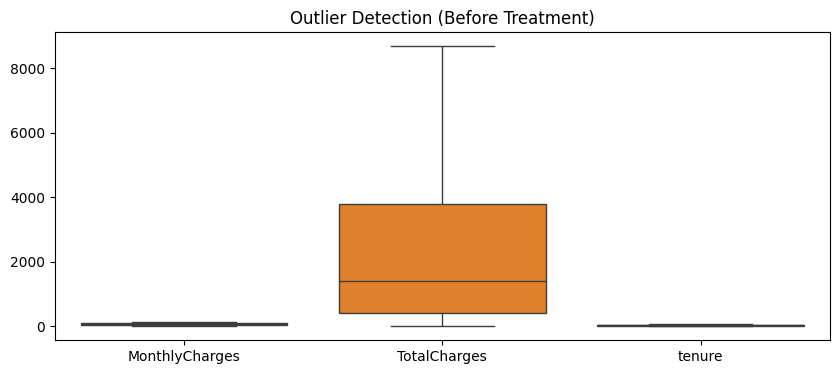

In [45]:
# Boxplot for numerical columns
plt.figure(figsize=(10, 4))
sns.boxplot(data=df[['MonthlyCharges', 'TotalCharges', 'tenure']])
plt.title("Outlier Detection (Before Treatment)")
plt.show()

## b. Remove Outliers (Using IQR)

In [46]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Example: Remove outliers in MonthlyCharges
df_clean = remove_outliers(df, 'MonthlyCharges')

# Compare shapes
print(f"Original rows: {df.shape[0]} | After outlier removal: {df_clean.shape[0]}")

Original rows: 7043 | After outlier removal: 7043


## c. Visualize After Treatment

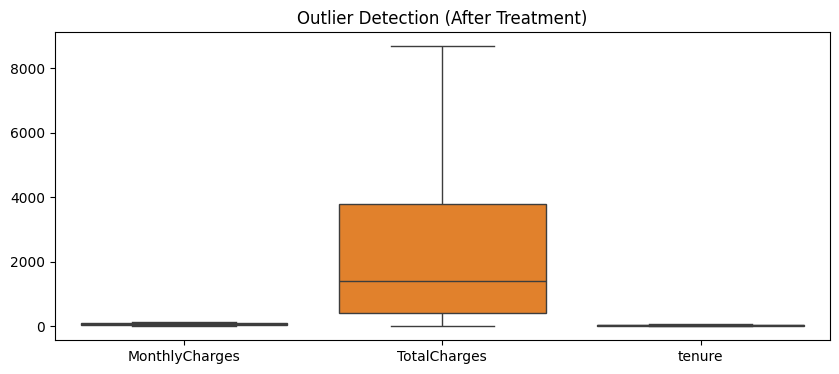

In [47]:
plt.figure(figsize=(10, 4))
sns.boxplot(data=df_clean[['MonthlyCharges', 'TotalCharges', 'tenure']])
plt.title("Outlier Detection (After Treatment)")
plt.show()

## 4. Standardize Categorical Values

In [48]:
# Fix typos (e.g., "Fiber optic" → "FiberOptic")
df_clean['InternetService'] = df_clean['InternetService'].str.replace(' ', '')

# Standardize PaymentMethod (e.g., "Bank transfer (automatic)" → "Bank Transfer")
df_clean['PaymentMethod'] = df_clean['PaymentMethod'].str.replace(' (automatic)', '', regex=False)

# Verify changes
print("Unique InternetService values:", df_clean['InternetService'].unique())
print("Unique PaymentMethod values:", df_clean['PaymentMethod'].unique())

Unique InternetService values: ['DSL' 'Fiberoptic' 'No']
Unique PaymentMethod values: ['Electronic check' 'Mailed check' 'Bank transfer' 'Credit card']


In [49]:
# Export cleaned dataset
df_clean.to_csv('telco_churn_cleaned.csv', index=False)

# Exploratory Data Analysis (EDA)

## 1. Univariate Analysis|

## a. Numerical Variables

            tenure  MonthlyCharges  TotalCharges
count  7043.000000     7043.000000   7043.000000
mean     32.371149       64.761692   2281.916928
std      24.559481       30.090047   2265.270398
min       0.000000       18.250000     18.800000
25%       9.000000       35.500000    402.225000
50%      29.000000       70.350000   1397.475000
75%      55.000000       89.850000   3786.600000
max      72.000000      118.750000   8684.800000


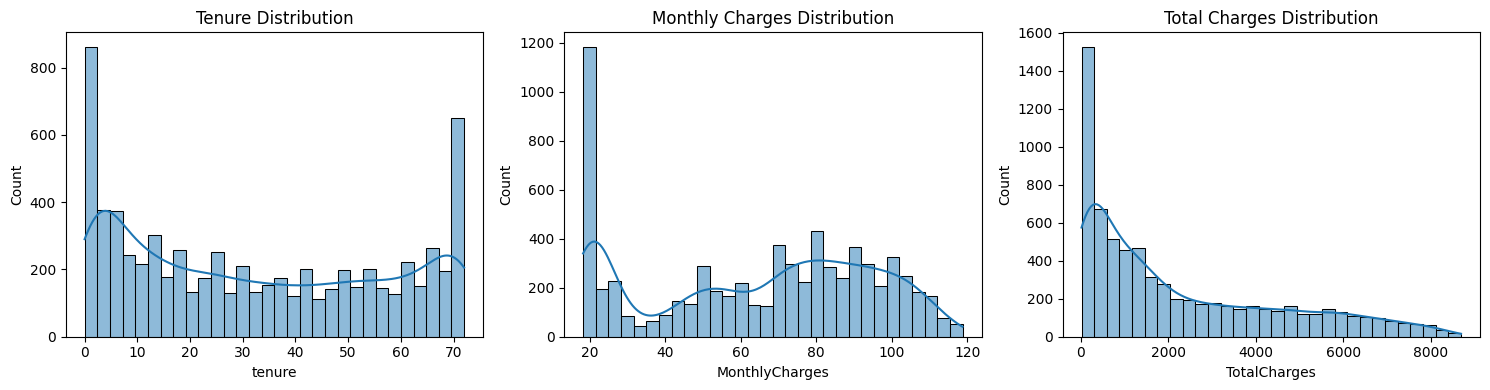

In [50]:
# Summary statistics for numerical columns
print(df_clean[['tenure', 'MonthlyCharges', 'TotalCharges']].describe())

# Histograms
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
sns.histplot(df_clean['tenure'], bins=30, kde=True)
plt.title('Tenure Distribution')

plt.subplot(1, 3, 2)
sns.histplot(df_clean['MonthlyCharges'], bins=30, kde=True)
plt.title('Monthly Charges Distribution')

plt.subplot(1, 3, 3)
sns.histplot(df_clean['TotalCharges'], bins=30, kde=True)
plt.title('Total Charges Distribution')
plt.tight_layout()
plt.show()

## b. Categorical Variables

Churn Distribution:
 Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

Contract Types:
 Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64


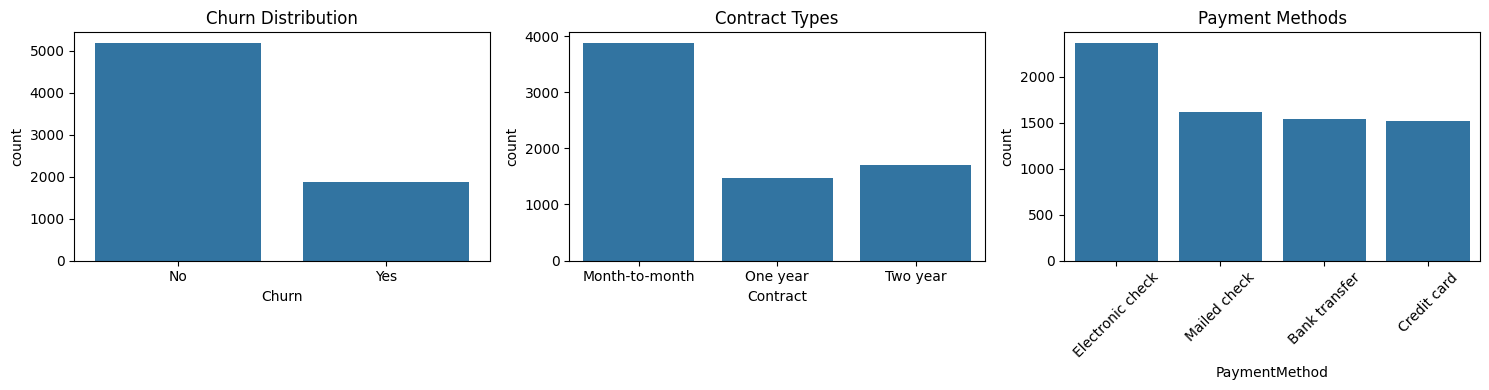

In [51]:
# Frequency tables
print("Churn Distribution:\n", df_clean['Churn'].value_counts(normalize=True))
print("\nContract Types:\n", df_clean['Contract'].value_counts())

# Bar plots
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
sns.countplot(data=df_clean, x='Churn')
plt.title('Churn Distribution')

plt.subplot(1, 3, 2)
sns.countplot(data=df_clean, x='Contract')
plt.title('Contract Types')

plt.subplot(1, 3, 3)
sns.countplot(data=df_clean, x='PaymentMethod')
plt.xticks(rotation=45)
plt.title('Payment Methods')
plt.tight_layout()
plt.show()

## 2. Bivariate Analysis

## a. Numerical vs Numerical

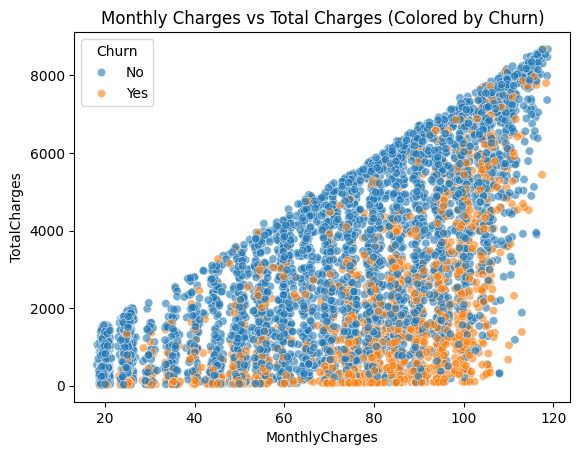

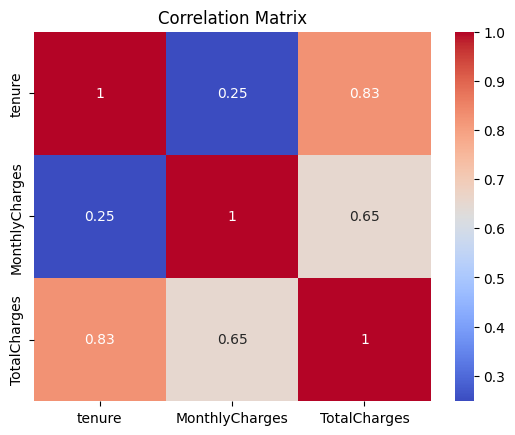

In [52]:
# Scatter plot: MonthlyCharges vs TotalCharges
sns.scatterplot(data=df_clean, x='MonthlyCharges', y='TotalCharges', hue='Churn', alpha=0.6)
plt.title('Monthly Charges vs Total Charges (Colored by Churn)')
plt.show()

# Correlation matrix
corr = df_clean[['tenure', 'MonthlyCharges', 'TotalCharges']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## b. Categorical vs Numerical

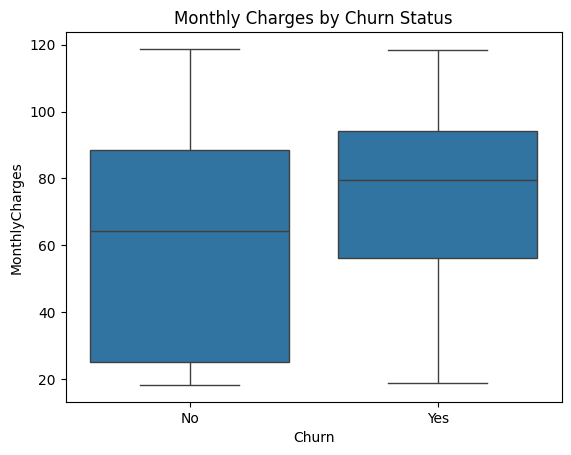

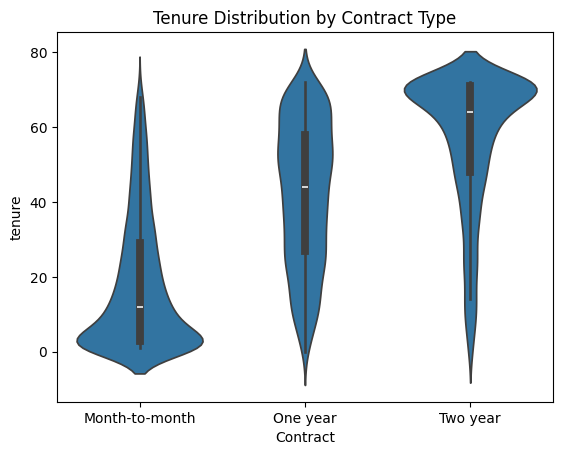

In [53]:
# Box plot: Churn vs MonthlyCharges
sns.boxplot(data=df_clean, x='Churn', y='MonthlyCharges')
plt.title('Monthly Charges by Churn Status')
plt.show()

# Violin plot: Contract vs Tenure
sns.violinplot(data=df_clean, x='Contract', y='tenure')
plt.title('Tenure Distribution by Contract Type')
plt.show()

## c. Categorical vs Categorical

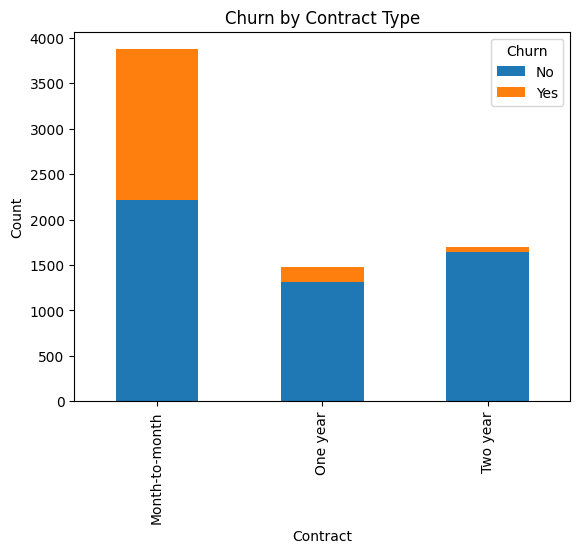

In [54]:
# Stacked bar plot: Churn vs Contract
pd.crosstab(df_clean['Contract'], df_clean['Churn']).plot(kind='bar', stacked=True)
plt.title('Churn by Contract Type')
plt.ylabel('Count')
plt.show()

## 3. Multivariate Analysis

## a. Pair Plot

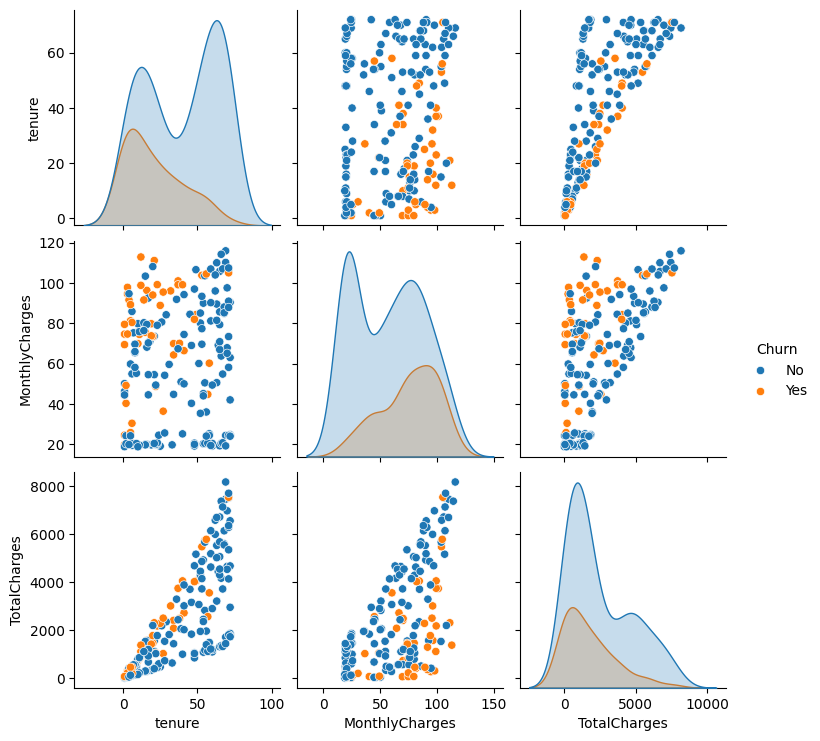

In [55]:
# Sample 200 rows for clarity
sample_df = df_clean.sample(200)
sns.pairplot(sample_df, vars=['tenure', 'MonthlyCharges', 'TotalCharges'], hue='Churn')
plt.show()

## b. Heatmap for Categorical Interactions

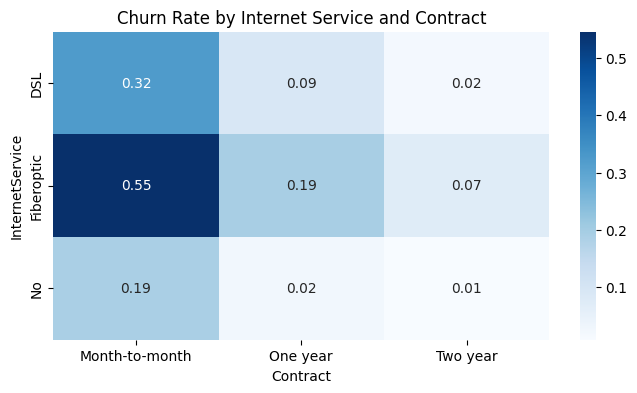

In [56]:
# 1. Convert Churn to numeric
df_clean['Churn'] = df_clean['Churn'].map({'Yes': 1, 'No': 0})

# 2. Group and pivot
grouped = df_clean.groupby(['InternetService', 'Contract'])['Churn'].mean().reset_index()
pivot_table = grouped.pivot(index='InternetService', columns='Contract', values='Churn')

# 3. Plot heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap='Blues')
plt.title('Churn Rate by Internet Service and Contract')
plt.show()

## c. Faceted Analysis

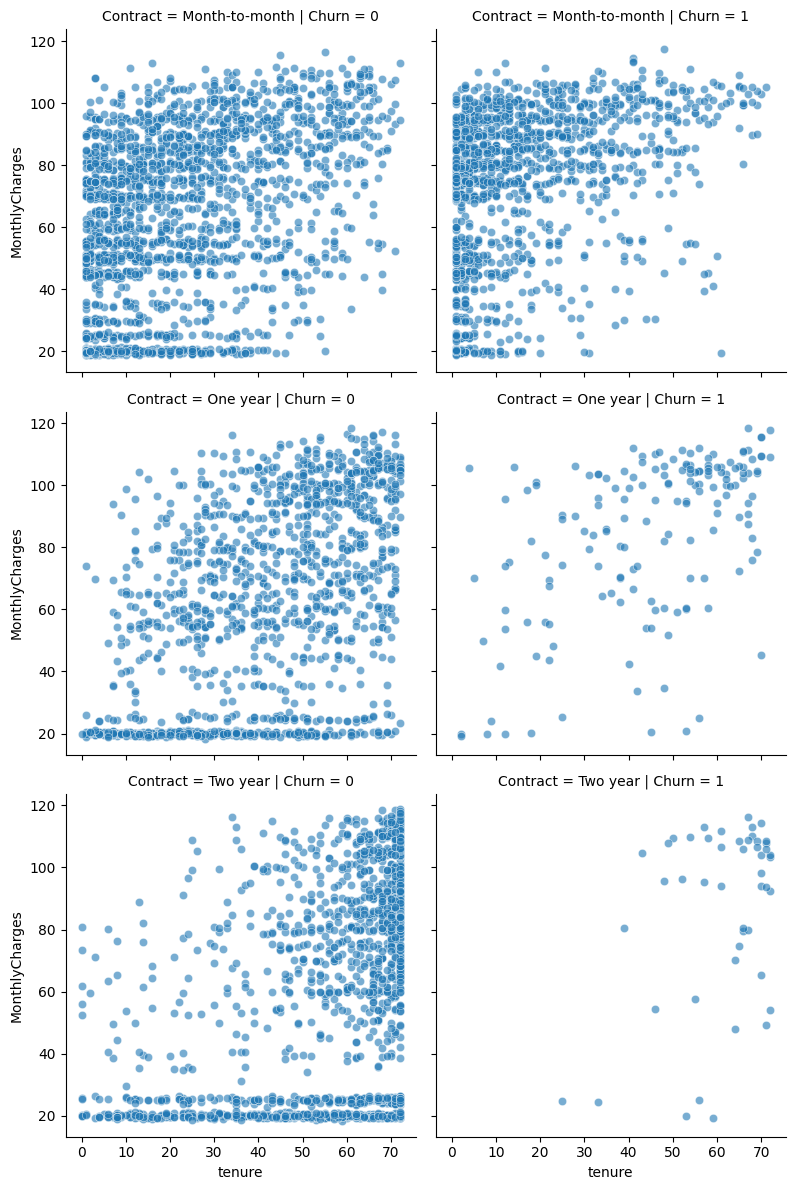

In [57]:
# Facet grid: Tenure vs MonthlyCharges by Churn and Contract
g = sns.FacetGrid(df_clean, col='Churn', row='Contract', height=4)
g.map(sns.scatterplot, 'tenure', 'MonthlyCharges', alpha=0.6)
g.add_legend()
plt.show()